<a href="https://colab.research.google.com/github/rkbindiisc/TestGithub/blob/master/Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting point: (0.0000, 0.0000)
Final point: (0.9901, 0.9673)
Best point found: (0.977380, 0.954038)
True minimum: (1.0000, 1.0000)
Best function value: 0.00066375
Final function value: 0.01699561
Acceptance rate: 0.12
Distance to true minimum: 0.05122652


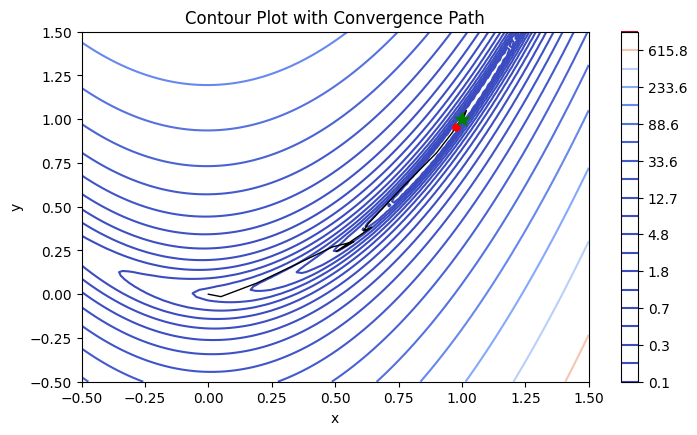

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Metropolis-Hastings algorithm for minimizing the Rosenbrock function
def metropolis_hastings(iterations=50000, x_start=-1.0, y_start=-1.0, proposal_std=0.05, temp=0.01):
    # Initial point
    current_x = x_start
    current_y = y_start
    current_value = rosenbrock(current_x, current_y)

    # Lists to store the path for plotting
    x_path = [current_x]
    y_path = [current_y]
    values = [current_value]

    # Keep track of the best point found
    best_x, best_y = current_x, current_y
    best_value = current_value

    acceptance_count = 0

    for i in range(iterations):
        # Adaptive proposal: smaller steps as we get closer to convergence
        if i > iterations // 2:
            current_proposal_std = proposal_std * 0.5
        else:
            current_proposal_std = proposal_std

        # Propose a new point
        proposed_x = current_x + np.random.normal(0, current_proposal_std)
        proposed_y = current_y + np.random.normal(0, current_proposal_std)
        proposed_value = rosenbrock(proposed_x, proposed_y)

        # Compute acceptance probability (using Boltzmann factor for minimization)
        delta = proposed_value - current_value
        acceptance_prob = np.exp(-delta / temp)

        # Accept or reject the proposal
        if delta <= 0 or np.random.random() < acceptance_prob:
            current_x = proposed_x
            current_y = proposed_y
            current_value = proposed_value
            acceptance_count += 1

            # Update best point if needed
            if current_value < best_value:
                best_x, best_y = current_x, current_y
                best_value = current_value

        # Store the current position (but not every iteration to reduce data size)
        if i % 10 == 0 or i == iterations - 1:
            x_path.append(current_x)
            y_path.append(current_y)
            values.append(current_value)

    acceptance_rate = acceptance_count / iterations
    return x_path, y_path, values, acceptance_rate, (best_x, best_y, best_value)

# Run the Metropolis-Hastings algorithm
np.random.seed(42)  # For reproducibility
x_path, y_path, values, acceptance_rate, (best_x, best_y, best_value) = metropolis_hastings(
    iterations=250,  # Increased iterations
    x_start=0.0,      # Start closer to solution
    y_start=0.0,
    proposal_std=0.10, # Smaller step size
    temp=0.01         # Lower temperature for less uphill movement
)

# Create plots to visualize the results
fig = plt.figure(figsize=(18, 10))

# Plot 1: 3D surface with path
#ax1 = fig.add_subplot(221, projection='3d')
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)
"""
# Plot the Rosenbrock surface
ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5, rstride=5, cstride=5)
ax1.set_zlim(0, 100)

# Plot the path on the surface
path_z = [rosenbrock(x_path[i], y_path[i]) for i in range(len(x_path))]
ax1.plot(x_path, y_path, path_z, 'k-', lw=1)
ax1.set_title('Rosenbrock Function with Convergence Path')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
"""
# Plot 2: Contour plot with path
ax2 = fig.add_subplot(222)
levels = np.logspace(-1, 3, 20)
contour = ax2.contour(X, Y, Z, levels=levels, cmap=cm.coolwarm)
ax2.plot(x_path, y_path, 'k-', lw=1)
ax2.plot(best_x, best_y, 'ro', ms=5)  # Best position found
ax2.plot(1, 1, 'g*', ms=10)  # True minimum
ax2.set_title('Contour Plot with Convergence Path')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2)

"""
# Plot 3: Function value over iterations
ax3 = fig.add_subplot(223)
ax3.plot(range(0, len(values)*10, 10), values)
ax3.set_title('Function Value vs. Iterations')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('f(x, y)')
ax3.set_yscale('log')
ax3.grid(True)

# Plot 4: Path in parameter space
ax4 = fig.add_subplot(224)
points = ax4.scatter(x_path, y_path, c=range(len(x_path)), cmap='viridis', alpha=0.5)
ax4.plot(1, 1, 'r*', ms=10)  # True minimum
ax4.set_title('Parameter Space Exploration')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.grid(True)
ax4.set_xlim(-0.5, 1.5)
ax4.set_ylim(-0.5, 1.5)
fig.colorbar(points, ax=ax4, label='Iteration')
"""
#plt.tight_layout()

# Print statistics
print(f"Starting point: ({x_path[0]:.4f}, {y_path[0]:.4f})")
print(f"Final point: ({x_path[-1]:.4f}, {y_path[-1]:.4f})")
print(f"Best point found: ({best_x:.6f}, {best_y:.6f})")
print(f"True minimum: (1.0000, 1.0000)")
print(f"Best function value: {best_value:.8f}")
print(f"Final function value: {values[-1]:.8f}")
print(f"Acceptance rate: {acceptance_rate:.2f}")
print(f"Distance to true minimum: {np.sqrt((best_x-1)**2 + (best_y-1)**2):.8f}")

#plt.savefig('metropolis_hastings_rosenbrock_improved.png', dpi=300)
plt.show()
